# Exercise 8: Unsupervised Learning - Dimensionality Reduction
## Theory
### Task 1: LLE - optimizing reconstruction loss $l(W) = \sum_{i=1}^t \lVert x_i - \sum_{j=1}^K W_{ij}x_j\rVert^2$
---
The constrained weights that best reconstruct eacht data point from its neighbors can be computed in closed form.

First, see Appendix A, page 9 in the [original LLE paper](http://www.cs.columbia.edu/~jebara/6772/papers/lleintro.pdf) and familiarize yourself with equations (3) and (4).

Then the solution of the given least squares problem can be computed by means of the Lagrangian function, that we presented in the lecture. For that we rephrase the problem as follows:

 - $min\ l(W) = min\sum_i l_i(w_i) = \sum_i min \sum_{jk}w_{ij}w_{ik}C_{jk}$, where $C_{jk} = (x_i-\eta_j)\cdot (x_i-\eta_k)$ subject to $\sum_j w_{ij} =1$ for all $i=1,...,n$

Letting the Lagrangian $L(W, \lambda) = f(W) + \lambda g(W)$, first define $f(W)$, and $g(W)$ according to our minimization problem, and then try to solve the problem analytically. 

First observe, that for a **fixed $i$**, i.e. the loss for a single point $x_i$, we have 
 - $\sum_{jk}w_{ij}w_{ik}(x_i-\eta_j)\cdot (x_i-\eta_k) = w_i^TCw_i$, where $C_{jk} = (x_i-\eta_j)\cdot (x_i-\eta_k)$. Reformulating the constraint in vector notation we get
 
 - $g(w_i) = (\mathbb 1^Tw_i -1)$,

and obtain the Lagrangian by
 - $L_i = f(w_i) - \lambda_i(g(w_i)) =:  l_i(w_i) - \lambda_i(\mathbb 1^Tw_i -1) $
   $= w_i^TCw_i - \lambda_i(\mathbb 1^Tw_i -1)$



Then 
 - $\frac{\partial l_i(w_i,\lambda_i)}{\partial w_i} = 2Cw_i - \lambda_i \mathbb 1 \Leftrightarrow w_i = \frac{\lambda}{2}C^{-1}\mathbb{1}$
 

$\Leftrightarrow \underbrace{\mathbb 1w_i}_{=1}=\mathbb 1^T\frac{\lambda}{2}C^{-1}\mathbb{1} \Leftrightarrow \frac{2}{\lambda}=\mathbb{1}^TC^{-1}\mathbb{1}$ 

$\implies w_i = \frac{C^{-1}\mathbb{1}}{\mathbb{1}^TC^{-1}\mathbb{1}}$

### [Optional] Principal components are orthogonal
---

Show that the principal components, i.e. the eigenvectors of the covariance matrix $S=\frac{1}{n}\tilde X\tilde X^T$ are orthogonal. 

Let $S$ denote the (symmetric) covariance matrix of our centered dataset $X$. Consider the two eigenvectors $u,v$ of $S$ with corresponding eigenvalues $\lambda$, $\mu$ resp.

Then $u^TAv = u^TA^Tv = (Au)^Tv = \lambda u^Tv$,

and
 - $u^TAv = u^T(\mu v) = \mu u^Tv$.
 
So we have $\mu u^Tv = \lambda u^Tv$

$\implies (\lambda-\mu)u^tv = 0$. So either $u^Tv = 0$ or $\lambda-\mu=0$, i.e. either $u$ and $v$ are orthogonal or $\lambda$ and $\mu$ are equal.

## Programming
### Task 1: Implementation of PCA
---
In this task you are asked to implement your own class PCA, that implements a subset of the functions in ```sklearn.decomposition.PCA class```. In particular, your class should implement a fit, transform, and inverse transform method. These should expect as an argument ```X```, a 2 dimensional numpy.ndarray. To compute the eigendecomposition of the covariance matrix of your centered data matrix```X```, you should use ```numpy.linalg.svd```.

In [20]:
class PCA:
  def __init__(self, n_components):
    self.n_components_ = n_components
    self.U = None
    self.sigma = None
    # [optional]
    self.explained_variance_ = None
    self.explained_variance_ratio_ = None

  def fit(self, X):
    assert type(X) == np.ndarray and X.ndim == 2, 'requires two dimensional numpy array'
    # center
    X -= X.mean(axis=0)
    # compute eigenvectors, eigenvalues of covariance matrix
    U, sigma, _ = np.linalg.svd(X.T)

    self.U = U[:, :self.n_components_]
    self.sigma = sigma
    # set explained_variance
    explained_variance_ = (sigma[:self.n_components_] ** 2) / (X.shape[0] - 1)
    total_var = explained_variance_.sum()
    self.explained_variance_ = explained_variance_
    self.explained_variance_ratio_ = explained_variance_ / total_var
    # return fitted PCA transformer
    return self

  def transform(self, X):
    print(X.shape)
    print(self.U.shape)
    # U dxp,   X nxd, result pxn
    # U^T pxd X^T dxn 
    #X -= X.mean(axis=0)
    return np.dot(self.U.T[:self.n_components_], X.T)

  def inverse_transform(self, X):
    # U dxp  X pxn , result dxn
    assert type(X) == np.ndarray and X.ndim == 2, 'requires two dimensional numpy array'
    return np.dot(self.U.T[:self.n_components_].T, X)


In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

bunch = fetch_olivetti_faces()
X, y = bunch.data, bunch.target
plt.imshow(X[0].reshape(64,64))
plt.show()
# add noise to first image
noisy_face = X[0] + np.random.random((4096,))
noisy_face = noisy_face.reshape((1,4096))
plt.imshow(noisy_face.reshape(64,64))
plt.show()

# fit pca, i.e. compute SVD of X and store matrix U[:p], where p = n_components
pca = PCA(18)
pca.fit(X)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
# project noisy image to PC space using projected_image = np.dot(U[:p], image)
projected_image = pca.transform(noisy_face)
# reconstruct_image  by calling np.dot(U[:p], projected_image)
reconstructed_image = pca.inverse_transform(projected_image)
# we lost the variation of data on the last d-p principal components, because we reconstructed
plt.imshow(reconstructed_image.reshape(64,64))
plt.show()


NameError: name 'plt' is not defined

## Programming
### [Optional] Extending PCA implementation
---
Extend your PCA implementation, such that
 1. if n_components=None, then all principal components are used
 2. it has attributes ```explained_variance_``` and ```explained_variance_ratio``` such that after fitting, these attributes return the same values as the reference implementation in ```sklearn.decomposition.PCA```.

### [Optional] Task 2: Visualize Mnist in 2D using t-SNE
---
Use sklearn.datasets.load_digits to load the Mnist dataset. Then,
using ```sklearn.manifold.TSNE``` and/or ```sklearn.decomposition.PCA```, try to plot a picture that is close to 
<img src="img\hw.png" alt="Drawing" style="width: 1024px;"/>

[Source](https://www.kdnuggets.com/wp-content/uploads/tsne-plot-mnist.jpg)

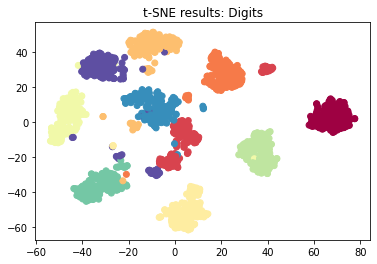

In [1]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
digits = load_digits()
X, y = digits.data, digits.target
X_embed = TSNE(random_state=0).fit_transform(X)
plt.scatter(X_embed[:,0], X_embed[:,1], c=y,cmap=plt.cm.Spectral)
plt.title('t-SNE results: Digits')
plt.show()